In [11]:
import pandas as pd
import numpy as np

In [12]:
import zipfile
# 1. Extract the zip file
with zipfile.ZipFile("AB_NYC_2019.csv.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

In [13]:
#Load the dataset
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
#shape of the dataset
df.shape

(48895, 16)

In [15]:
#summary
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [16]:
#structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [17]:
#no of columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [18]:
#columns in a list
df.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [19]:
#no fo null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [20]:
#Handling null values
df['reviews_per_month']=df['reviews_per_month'].fillna(0)
df=df.drop(['name','host_name'],axis=1)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [21]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [22]:
#remove duplicates
df=df.drop_duplicates()

In [23]:

#Handling outliers because it have crazy values like price = 0 or too high
print("Max price:", df['price'].max())
print("Min price:", df['price'].min())

Max price: 10000
Min price: 0


In [24]:
df = df[(df['price'] > 0) & (df['price'] < 1000)]
df = df[df['minimum_nights'] < 365]


In [25]:
print("\nPrice Stats Before Cleaning:")
print(df['price'].describe())


Price Stats Before Cleaning:
count    48546.000000
mean       140.250608
std        112.901015
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        999.000000
Name: price, dtype: float64


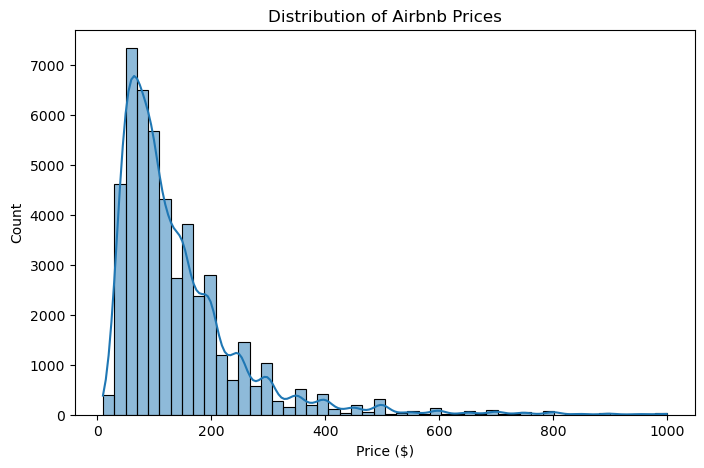

In [26]:
#1.Price Distribution (Histogram + KDE)
   #We need to see how prices are distributed. Are they normal? Skewed? Do we have many cheap or expensive listings?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()


In [27]:
df['room_type'].values

array(['Private room', 'Entire home/apt', 'Private room', ...,
       'Entire home/apt', 'Shared room', 'Private room'], dtype=object)

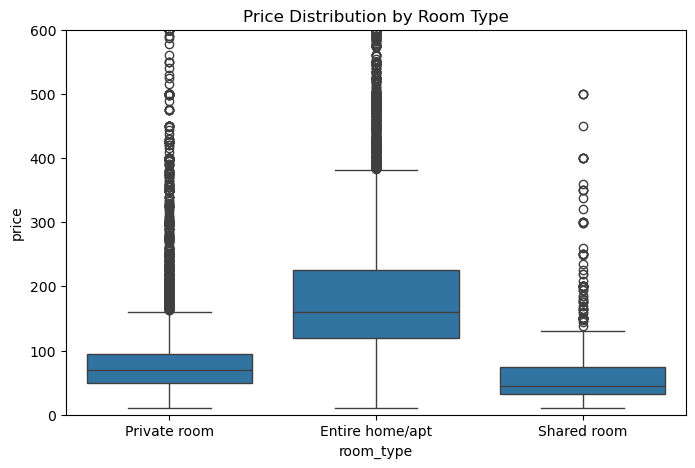

In [28]:
# 2.Price vs Room Type (Boxplot)
    # Room type is one of the strongest predictors of price.
    # Entire homes/apartments usually cost much more than private/shared rooms.
    # Boxplots are best for comparing distribution + outliers across categories
plt.figure(figsize=(8,5))
sns.boxplot(x="room_type", y="price", data=df)
plt.ylim(0, 600)  # limit axis to avoid extreme outliers
plt.title("Price Distribution by Room Type")
plt.show()


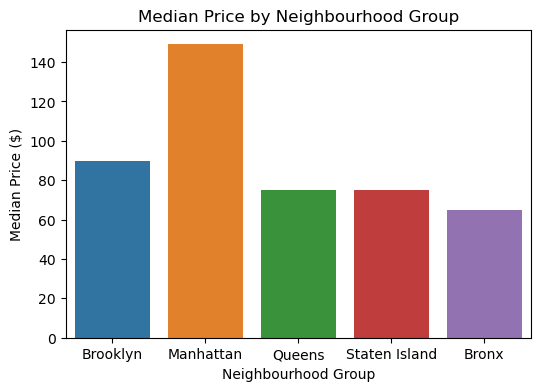

In [18]:
# Price by Neighbourhood Group(bar chart)
# Why this graph?
    # Location is one of the biggest factors in Airbnb pricing.
    # Touristy/prime areas (like Manhattan) usually charge higher.
    # Outer areas (like Bronx/Staten Island) are cheaper.
    # A barplot helps compare average (or median) prices across different neighbourhood groups.
plt.figure(figsize=(6,4))
sns.barplot(
    x="neighbourhood_group",
    y="price",
    data=df,
    estimator="median",
    errorbar=None,
    hue='neighbourhood_group',
    legend=False
    # palette="muted"
)
plt.title("Median Price by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Median Price ($)")
plt.show()


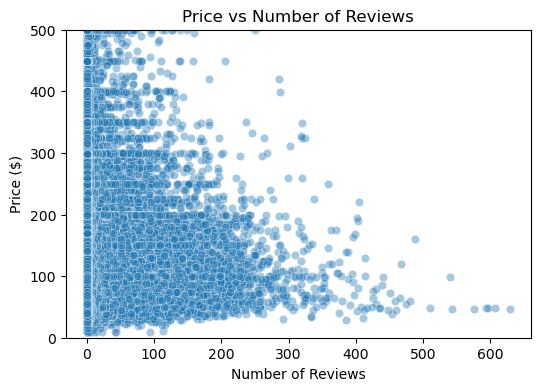

In [113]:
# Reviews vs Price

# Why this graph?
    # We want to see if there’s a relationship between price and number of reviews:
    # Do cheaper listings get more reviews because they are booked more often?
    # Do expensive listings get fewer reviews (luxury stays, niche audience)?
    # A scatterplot is best for checking the relationship between two continuous variables.
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="number_of_reviews",
    y="price",
    data=df,
    alpha=0.4
)
plt.ylim(0, 500)
plt.title("Price vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.show()


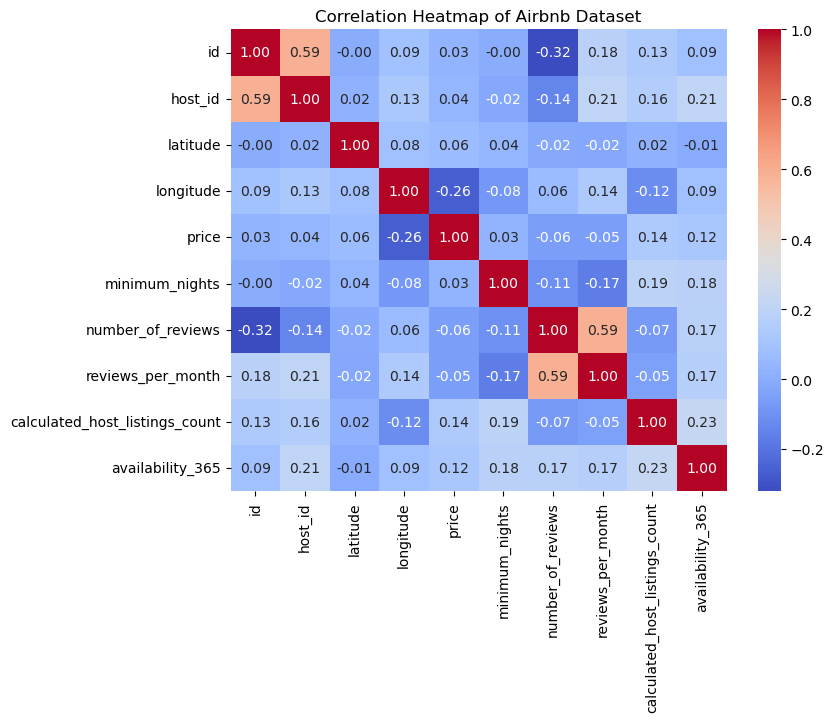

In [114]:
# Correlation Heatmap
    # Why this graph?
    # We want to see how numerical features relate to each other.
    # Example: Does availability_365 correlate with reviews_per_month?
    # Does minimum_nights relate to price?
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Airbnb Dataset")
plt.show()
# +1 → strong positive relationship (as one increases, the other increases).
# -1 → strong negative relationship (as one increases, the other decreases).
# 0 → no relationship.

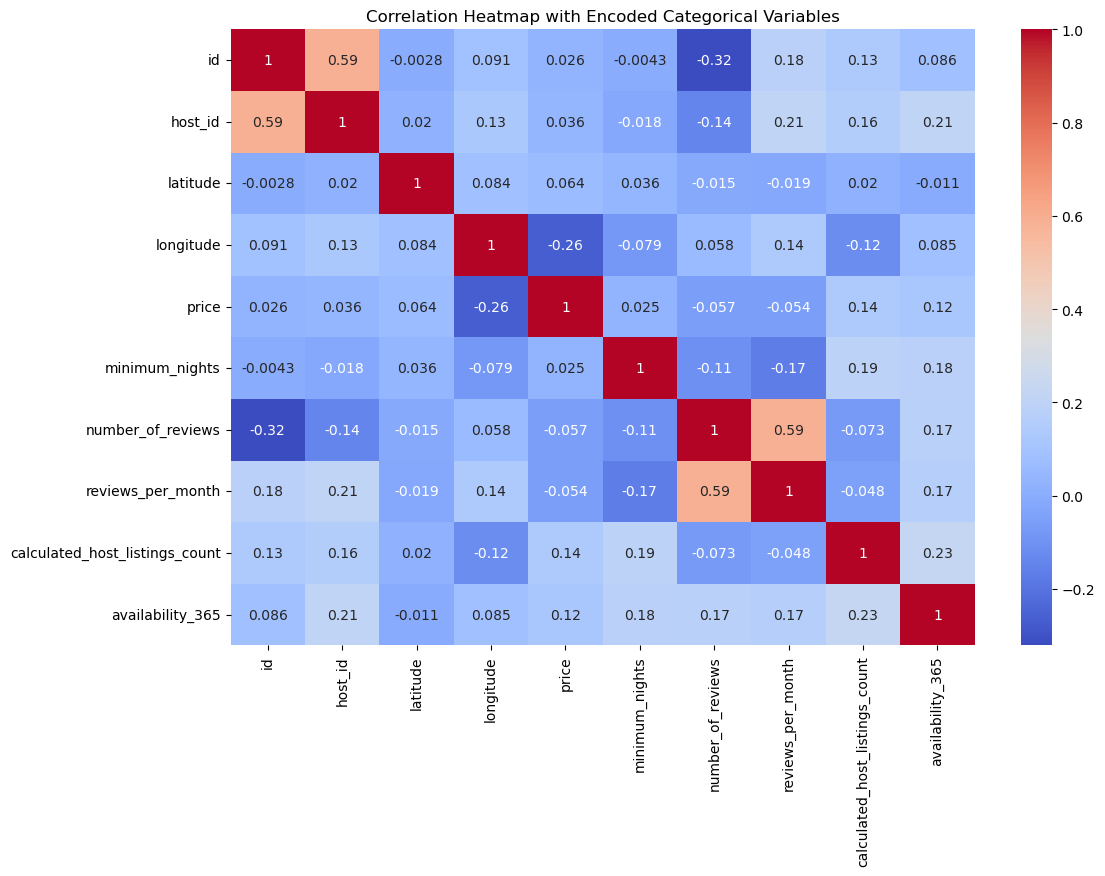

In [17]:
# Apply One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group','room_type'], drop_first=True)
# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=['int64','float64'])
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with Encoded Categorical Variables")
plt.show()

In [116]:
!pip install folium

In [ ]:
import folium
# Create base map centered on NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add points (sampled for performance)
for i in range(0, len(df), 500):  # plot every 500th row to reduce lag
    folium.CircleMarker(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=2,
        color='red' if df.iloc[i]['price'] > 200 else 'blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)


#ML-model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [31]:
numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

In [32]:
# Step 6: Train-Test Split
X = df.drop('price', axis=1)
y = df['price']

In [33]:
print(X)

             id   host_id neighbourhood_group       neighbourhood  latitude  \
0          2539      2787            Brooklyn          Kensington  40.64749   
1          2595      2845           Manhattan             Midtown  40.75362   
2          3647      4632           Manhattan              Harlem  40.80902   
3          3831      4869            Brooklyn        Clinton Hill  40.68514   
4          5022      7192           Manhattan         East Harlem  40.79851   
...         ...       ...                 ...                 ...       ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant  40.67853   
48891  36485057   6570630            Brooklyn            Bushwick  40.70184   
48892  36485431  23492952           Manhattan              Harlem  40.81475   
48893  36485609  30985759           Manhattan      Hell's Kitchen  40.75751   
48894  36487245  68119814           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  minimum_nights  

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape


(38836, 13)

In [35]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_features),
        ('cat', cat_transformer, categorical_features)
    ])

In [37]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

In [38]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['latitude', 'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['neighbourhood_group',
                                                   'neighbourhood',
                                                   'room_type'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [39]:
y_pred = model.predict(X_test)
print(y_pred)

[ 73.855 125.39  116.93  ...  59.895  74.085 275.99 ]


In [40]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [41]:
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 84.90300862393501
R2 Score: 0.43979084818580705


In [43]:
# Example new data
new_data = pd.DataFrame({
    'neighbourhood_group': ['Brooklyn'],
    'neighbourhood': ['Williamsburg'],
    'room_type': ['Entire home/apt'],
    'minimum_nights': [3],
    'number_of_reviews': [25],
    'reviews_per_month': [0.5],
    'calculated_host_listings_count': [2],
    'availability_365': [180],
    'latitude': [40.7081],
    'longitude': [-73.9571]
})

predicted_price = model.predict(new_data)
print(f"Predicted Airbnb Price: ${predicted_price[0]:.2f}")


Predicted Airbnb Price: $222.55
